In [2082]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,StratifiedKFold

pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

import plotly
import plotly.express as px        # A wrapper of plotly
import plotly.graph_objects as go  # Used for plotly in a object oriented way

import cufflinks as cf             # Binds pandas and plotly
import plotly.offline as pyo       # using plotly offline
from plotly.offline import init_notebook_mode,plot,iplot

from plotly.subplots import make_subplots
pd.set_option('display.max_columns', 500)

In [2083]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [2084]:
train = pd.read_csv(r"C:/Users/kulka/Desktop/AV_Hackathon_Codes/HR_Analytics_Janatahack/Data/train_jqd04QH.csv")
test  = pd.read_csv(r"C:/Users/kulka/Desktop/AV_Hackathon_Codes/HR_Analytics_Janatahack/Data/test_KaymcHn.csv")

In [2085]:
train.enrollee_id.nunique(), test.enrollee_id.nunique()

(18359, 15021)

In [2086]:
Submission = test[['enrollee_id']]
train.drop('enrollee_id',axis=1,inplace=True)
test.drop('enrollee_id',axis=1,inplace=True)

In [2087]:
train.shape, test.shape

((18359, 13), (15021, 12))

1. Train data contains 18359 records and Test data contains 15021 records, so both are almost same in dimensions.

In [2088]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18359 non-null  object 
 1   city_development_index  18359 non-null  float64
 2   gender                  14261 non-null  object 
 3   relevent_experience     18359 non-null  object 
 4   enrolled_university     18017 non-null  object 
 5   education_level         17902 non-null  object 
 6   major_discipline        15521 non-null  object 
 7   experience              18300 non-null  object 
 8   company_size            13580 non-null  object 
 9   company_type            13320 non-null  object 
 10  last_new_job            17992 non-null  object 
 11  training_hours          18359 non-null  int64  
 12  target                  18359 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.8+ MB


1. Missing values in Gender, Enrolled_University, Education_Level, Major_Discipline, Experience, Company_Size, Company_Type, Last_New_Job variables.
2. Most of the columns except id variable, development index, training_hours and target variable are categorical in nature. 

In [2089]:
train.isna().sum()

city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [2090]:
test.isna().sum()

city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

### Target Variable

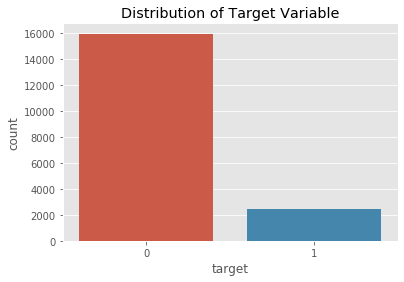

In [2091]:
sns.countplot(train['target']);
plt.title("Distribution of Target Variable");

1. Looks like there is class imbalance in the target variable.
2. As we can see below, almost 87% of the values are of one class and the rest are of another class.
3. So most of the candidates in the train data are not looking for a job change and few are looking for job change.

In [2092]:
train['target'].value_counts(dropna=False)/len(train)

0    0.867912
1    0.132088
Name: target, dtype: float64

### Dependent Variables

#### city_id

In [2093]:
train['city'].nunique(), test['city'].nunique()

(123, 123)

Both Train and Test datasets have same number of Unique Values

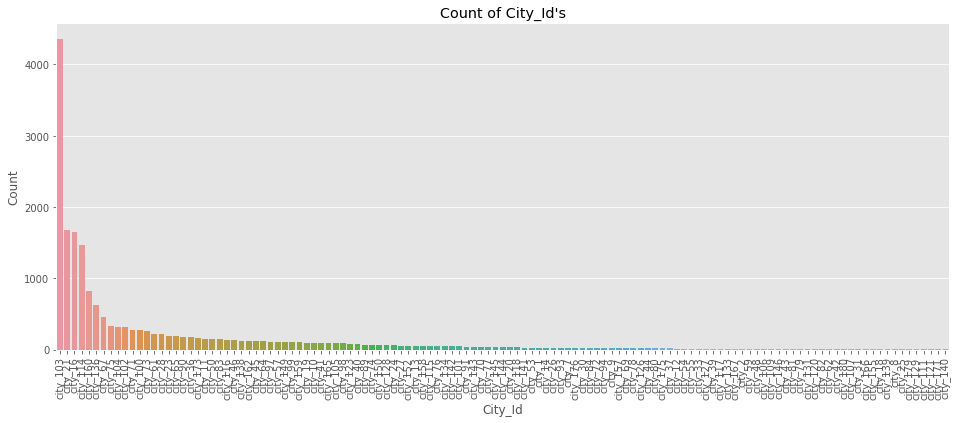

In [2094]:
plt.figure(figsize=(16,6));
sns.barplot(x=train['city'].value_counts(dropna=False).index.values,y=train['city'].value_counts(dropna=False).values);
plt.xticks(rotation=90);
plt.xlabel("City_Id");
plt.ylabel("Count");
plt.title("Count of City_Id's");

1. No Missing values here in city_id variable.
2. Few of the city_id's are accounting for most of the values.

#### city_development_index

In [2095]:
train['city_development_index'].describe()

count    18359.000000
mean         0.847140
std          0.110189
min          0.448000
25%          0.796000
50%          0.910000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

1. Maximum city_development_index rating is 0.949, and minimum value is 0.448.
2. Median value is 0.91, so a lot of values are towards the right. the distribution is slightly right skewed. 
3. Average value of city_development index is 0.847, this is expected as most of the values are upwards of 0.90 and it drives the average towards that value.

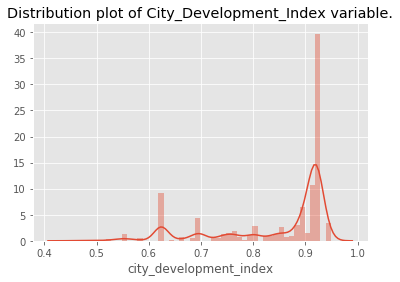

In [2096]:
sns.distplot(train['city_development_index']);
plt.title("Distribution plot of City_Development_Index variable.");

#### gender

In [2097]:
train['gender'].value_counts(dropna=False).sort_values(ascending=False)

Male      12884
NaN        4098
Female     1188
Other       189
Name: gender, dtype: int64

In [2098]:
test['gender'].value_counts(dropna=False).sort_values(ascending=False)

Male      10578
NaN        3388
Female      897
Other       158
Name: gender, dtype: int64

Text(0.5, 1.0, 'Bar plot of Gender Variable')

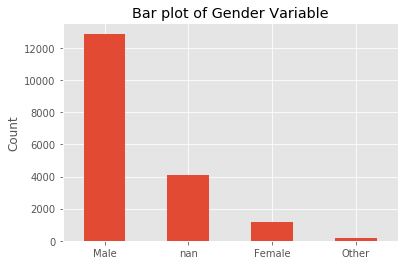

In [2099]:
train['gender'].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot of Gender Variable")

1. Lot of Missing values in gender, approximately 22% of the values are missing.
2. There is also another gender apart from Male and Female. 
3. Missing values can either be imputed with the mode (Which will lead to the variable being highly skewed towards Male), or missing values can be placed in another category.

#### relevent_experience

In [2100]:
train['relevent_experience'].value_counts(dropna=False).sort_values(ascending=False)

Has relevent experience    13596
No relevent experience      4763
Name: relevent_experience, dtype: int64

In [2101]:
test['relevent_experience'].value_counts(dropna=False).sort_values(ascending=False)

Has relevent experience    11102
No relevent experience      3919
Name: relevent_experience, dtype: int64

1. Approximately 74% of students have relevant experience in the field and 25% do not.

#### enrolled_university

In [2102]:
train['enrolled_university'].value_counts(dropna=False).sort_values(ascending=False)

no_enrollment       13659
Full time course     3187
Part time course     1171
NaN                   342
Name: enrolled_university, dtype: int64

In [2103]:
test['enrolled_university'].value_counts(dropna=False).sort_values(ascending=False)

no_enrollment       11228
Full time course     2565
Part time course      949
NaN                   279
Name: enrolled_university, dtype: int64

1. Most of the students have not enrolled in any university course.
2. There are smoe missing values in this variable.
3. Few of the students have enrolled in a Full Time course and some have enrolled in Part Time course.

#### education_level

In [2104]:
train['education_level'].value_counts(dropna=False).sort_values(ascending=False)

Graduate          10769
Masters            4319
High School        2032
Phd                 459
NaN                 457
Primary School      323
Name: education_level, dtype: int64

In [2105]:
test['education_level'].value_counts(dropna=False).sort_values(ascending=False)

Graduate          8743
Masters           3478
High School       1676
Phd                422
NaN                395
Primary School     307
Name: education_level, dtype: int64

1. Missing values in this variable too.
2. More than half of them are Graduates, with almost 25% of them having Masters degree.
3. 11% of them are just High School graduates and few of them have just passed primary school.
4. There are 459 people with Phd.

#### major_discipline

In [ ]:
train['major_discipline'].value_counts(dropna=False).sort_values(ascending=False)

In [ ]:
test['major_discipline'].value_counts(dropna=False).sort_values(ascending=False)

1. 15% missing values in this variable.
2. Around 75% of them have their major discipline as STEM.
3. Humanities, Business Degree, Arts form a minor percentage.
4. A small percentage of them hav no major.

#### experience

In [ ]:
train['experience'].value_counts(dropna=False).sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(10,6));
train['experience'].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot of Experience Variable")

1. Around 20% of them have more than 20 years of experience.
2. There are few missing values here as well.
3. Looking at the experience summary above it can be said that most of the people with more than 15 years of experience might not be lookiing for a job change and might just want to learn things. 
4. There are 416 people with less than 1 year of experience.

#### company_size

In [ ]:
plt.figure(figsize=(10,6));
train['company_size'].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot of Company Size Variable")

1. Lot of missing values here.
2. Most of the students work for companies with 50-100 strength.
3. 10-49 is entered as 10/49 which needs modification.
4. Since missing values is itself a mode, it can be changed to another category.

#### company_type

In [ ]:
plt.figure(figsize=(12,6));
train['company_type'].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot of Company Type Variable")

1. Most of the students work for Pvt companies. Lot of missing values here.

#### last_new_job

In [ ]:
plt.figure(figsize=(12,6));
train['last_new_job'].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot of last_new_job Variable")

1. Majority of them have less than a year of difference between their current job and the previous one.
2. Some of them have not changed their job at all.
3. There are missing values in this variable as well.

#### training_hours

In [ ]:
train['training_hours'].describe()

1. Minimum training Hour is 1 which is surprising value and doesn't make sense.
2. Maximum training hours is 336 hours and average training hours is 66 hours with median being 47 hours.
3. The maximum value might be an outlier by considering the other values.
4. It's a negatively skewed distribution as can be seen below from the distribution plot.

In [ ]:
Q3 = train['training_hours'].quantile(0.75)
Q1 = train['training_hours'].quantile(0.25)
IQR = Q3-Q1
lower_outlier = Q1-(1.5*IQR)
upper_outlier = Q3+(1.5*IQR)
print ("Values below {} and values above {} can be considered as outliers".format(lower_outlier,upper_outlier))

In [ ]:
sns.distplot(train['training_hours'])

In [ ]:
train['training_hours'].value_counts(dropna=False).sort_values(ascending=False).head(20)

### Bi-Variate Analysis

In [ ]:
train.groupby('gender')['target'].value_counts().unstack().plot(kind='bar',title="Distribution of Target Variable by gender")
plt.xlabel("gender")
plt.ylabel("Count")
plt.xticks(rotation=360)

In [ ]:
train.groupby('relevent_experience')['target'].value_counts().unstack().plot(kind='bar',title="Distribution of Target Variable by relevent_experience")
plt.xlabel("relevent_experience")
plt.ylabel("Count")
plt.xticks(rotation=360)

1. As we can see in the above plot, Most of the students having relevant experience, do not need a new job.
2. Even in the case with no relevant experience, most of them don't need a new job.

In [ ]:
train.groupby('enrolled_university')['target'].value_counts().unstack().plot(kind='bar',title="Distribution of Target Variable by enrolled_university")
plt.xlabel("enrolled_university")
plt.ylabel("Count")
plt.xticks(rotation=360)

We can see above that majority of the job seekers have no enrollment in the university.

In [ ]:
train.groupby('education_level')['target'].value_counts().unstack().plot(kind='bar',title="Distribution of Target Variable by education_level")
plt.xlabel("education_level")
plt.ylabel("Count")
plt.xticks(rotation=45)

1. We can see that majority of the students looking for job are Graduates followed by people with Masters degree.

In [ ]:
train.groupby('major_discipline')['target'].value_counts().unstack().plot(kind='bar',title="Distribution of Target Variable by major_discipline")
plt.xlabel("major_discipline")
plt.ylabel("Count")
plt.xticks(rotation=45)

In [ ]:
train.groupby('company_size')['target'].value_counts().unstack().plot(kind='bar',title="Distribution of Target Variable by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.xticks(rotation=45)

In [ ]:
train.groupby('company_type')['target'].value_counts().unstack().plot(kind='bar',title="Distribution of Target Variable by Company Type")
plt.xlabel("Company Type")
plt.ylabel("Count")
plt.xticks(rotation=360)

In [ ]:
train.groupby('last_new_job')['target'].value_counts().unstack().plot(kind='bar',title="Distribution of Target Variable by last_new_job")
plt.xlabel("last_new_job")
plt.ylabel("Count")
plt.xticks(rotation=360)

### Missing Value treatment, Feature Generation.

In [ ]:
def experience_binning(x):
    if x<=5:
        return "Low"
    elif (x>5 and x<=10):
        return "Medium"
    elif (x>10 and x<=15):
        return "High"
    else:
        return "Very_High"

def company_size_binning(x):
    if x=="<10":
        return "Low"
    elif x=="10-49":
        return "Low"
    elif x=="50-99":
        return "Low"
    elif x=="100-500":
        return "Low"
    elif x=="500-999":
        return "Low"
    elif x=="1000-4999":
        return "Medium"
    elif x=="5000-9999":
        return "Medium"
    elif x=="10000+":
        return "High"
    else:
        return "Missing"
    
def city_development_index_binning(x):
    if x<=0.75:
        return "Low"
    elif (x>0.75 and x<=0.90):
        return "Medium"
    else:
        return "High"

In [ ]:
for df in [train,test]:
    df['experience'] = df['experience'].replace({"<1":"0",">20":"21"})
    df['experience'].fillna("20",inplace=True)
    df['experience'] = df['experience'].astype(int)
    df['Experience_Binning'] = df['experience'].apply(experience_binning)
    
    df['gender'].fillna("Missing",inplace=True)
    df['enrolled_university'].fillna("Missing",inplace=True)
    df['education_level'].fillna("Missing",inplace=True)
    df['major_discipline'].fillna("Missing",inplace=True)
    
    df['company_size'].fillna("Missing",inplace=True)
    df['company_size'].replace({"10/49":"10-49"},inplace=True)
    df['Company_Size_Binning'] = df['company_size'].apply(company_size_binning)
    
    df['company_type'].fillna("Missing",inplace=True)
    df['last_new_job'].fillna("Missing",inplace=True)
    df['City_Development_Index_Binning'] = df['city_development_index'].apply(city_development_index_binning)

In [ ]:
train.isna().sum()

In [ ]:
test.isna().sum()

In [ ]:
# Let's check the categorical columns that have high cardinality.

In [ ]:
for col in train.columns:
    if train[col].dtype == "object":
        print ("Number of Unique Values in {} Variable in Train data are:{}".format(col,train[col].nunique()))

In [ ]:
for col in train.columns:
    if train[col].dtype == "object":
        print ("Number of Unique Values in {} Variable in Test data are:{}".format(col,test[col].nunique()))

1. We can see that all the variables in both Train and Test data have same cardinality. 
2. Cardinality of City variable is very high and hence doesn't make sense to create dummy variables out of it.

In [ ]:
# Creating Mean Encoded features.

In [ ]:
target_mean_grouped_by_gender = np.round(train.groupby('gender')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_gender'] = train['gender'].map(target_mean_grouped_by_gender)

target_mean_grouped_by_relevent_exp = np.round(train.groupby('relevent_experience')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_relevent_exp'] = train['relevent_experience'].map(target_mean_grouped_by_relevent_exp)

target_mean_grouped_by_enrolled_university = np.round(train.groupby('enrolled_university')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_enrolled_university'] = train['enrolled_university'].map(target_mean_grouped_by_enrolled_university)

target_mean_grouped_by_education_level = np.round(train.groupby('education_level')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_education_level'] = train['education_level'].map(target_mean_grouped_by_education_level)

target_mean_grouped_by_major_discipline = np.round(train.groupby('major_discipline')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_major_discipline'] = train['major_discipline'].map(target_mean_grouped_by_major_discipline)

target_mean_grouped_by_experience = np.round(train.groupby('experience')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_experience'] = train['experience'].map(target_mean_grouped_by_experience)

target_mean_grouped_by_company_size = np.round(train.groupby('company_size')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_company_size'] = train['company_size'].map(target_mean_grouped_by_company_size)

target_mean_grouped_by_company_type = np.round(train.groupby('company_type')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_company_type'] = train['company_type'].map(target_mean_grouped_by_company_type)

test['target_mean_grouped_by_gender'] = test['gender'].map(target_mean_grouped_by_gender)
test['target_mean_grouped_by_relevent_exp'] = test['relevent_experience'].map(target_mean_grouped_by_relevent_exp)
test['target_mean_grouped_by_enrolled_university'] = test['enrolled_university'].map(target_mean_grouped_by_enrolled_university)
test['target_mean_grouped_by_education_level'] = test['education_level'].map(target_mean_grouped_by_education_level)
test['target_mean_grouped_by_major_discipline'] = test['major_discipline'].map(target_mean_grouped_by_major_discipline)
test['target_mean_grouped_by_experience'] = test['experience'].map(target_mean_grouped_by_experience)
test['target_mean_grouped_by_company_size'] = test['company_size'].map(target_mean_grouped_by_company_size)
test['target_mean_grouped_by_company_type'] = test['company_type'].map(target_mean_grouped_by_company_type)

In [ ]:
# Converting object ariables into categorical types

In [ ]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
train.shape, test.shape

In [ ]:
# Splitting data

In [ ]:
y = train['target']
X = train[[col for col in train.columns if col!="target"]]

In [ ]:
scaler = MinMaxScaler()
X[['training_hours','experience']] = scaler.fit_transform(X[['training_hours','experience']])
test[['training_hours','experience']] = scaler.fit_transform(test[['training_hours','experience']])

### Modelling

In [ ]:
kf = StratifiedKFold(n_splits=5,shuffle=False,random_state=42)
pred_test_full = np.zeros(test.shape[0])
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    X_Train,X_Val = X.loc[train_index],X.loc[test_index]
    y_Train,y_Val = y.loc[train_index],y.loc[test_index]
    
    #model
    cls = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=42,class_weight='balanced',max_features=0.5,max_depth=6,min_samples_leaf=7,min_samples_split=5)
    cls.fit(X_Train,y_Train)
    
    score_train = roc_auc_score(y_Train,cls.predict_proba(X_Train)[:,1])
    score_val = roc_auc_score(y_Val,cls.predict_proba(X_Val)[:,1])
    print('{} of KFold {}'.format(i,kf.n_splits))
    print('Training ROC AUC score:',score_train)
    print('Validation ROC AUC score:',score_val)
    print("-----------------------------------")
    cv_score.append(score_val)    
    pred_test_full += cls.predict_proba(test)[:, 1] / kf.n_splits
    i+=1
print ("Mean Cross Validation ROC AUC Score:{}".format(np.array(cv_score).mean()))

In [ ]:
probability = cls.predict_proba(X_Val)[:,1]
frp,trp, threshold = roc_curve(y_Val,probability)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp,trp,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [ ]:
plt.figure(figsize=(18,6))
ser = pd.Series(cls.feature_importances_,X_Train.columns).sort_values()
ser.plot(kind='bar')

In [ ]:
# Fetching variables with highest feature importance (top 50)
lst = list(ser.sort_values(ascending=False)[:50].index)
X = X[lst]
test = test[lst]

In [ ]:
kf = StratifiedKFold(n_splits=5,shuffle=False,random_state=42)
pred_test_full = np.zeros(test.shape[0])
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    X_Train,X_Val = X.loc[train_index],X.loc[test_index]
    y_Train,y_Val = y.loc[train_index],y.loc[test_index]
    
    #model
    cls = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=42,class_weight='balanced',max_features=0.5,max_depth=6,min_samples_leaf=7,min_samples_split=5)
    cls.fit(X_Train,y_Train)
    
    score_train = roc_auc_score(y_Train,cls.predict_proba(X_Train)[:,1])
    score_val = roc_auc_score(y_Val,cls.predict_proba(X_Val)[:,1])
    print('{} of KFold {}'.format(i,kf.n_splits))
    print('Training ROC AUC score:',score_train)
    print('Validation ROC AUC score:',score_val)
    print("-----------------------------------")
    cv_score.append(score_val)    
    pred_test_full += cls.predict_proba(test)[:, 1] / kf.n_splits
    i+=1
print ("Mean Cross Validation ROC AUC Score:{}".format(np.array(cv_score).mean()))

In [ ]:
probability = cls.predict_proba(X_Val)[:,1]
frp,trp, threshold = roc_curve(y_Val,probability)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp,trp,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [ ]:
plt.figure(figsize=(18,6))
ser = pd.Series(cls.feature_importances_,X_Train.columns).sort_values()
ser.plot(kind='bar')

In [ ]:
Submission['target'] = pred_test_full
#Submission.to_csv("Sub_30.csv",index=None)

In [ ]:
Submission.head()